In [3]:
import pandas as pd
import numpy as np

In [4]:
import torch

torch.cuda.is_available()

True

In [3]:
from fastai.vision.all import untar_data, URLs

path = untar_data(URLs.MNIST) 

path

Path('/home/t1nnur/.fastai/data/mnist_png')

In [5]:
from fastai.vision.all import ImageDataLoaders

dls = ImageDataLoaders.from_folder(path, train='training', valid='testing')

In [39]:
from fastai.vision.all import vision_learner, resnet34, accuracy

learner = vision_learner(dls, resnet34, metrics=accuracy)

In [40]:
learner.fine_tune(2)

epoch     train_loss  valid_loss  accuracy  time    
0         0.623629    0.421036    0.870200  00:20                                          
epoch     train_loss  valid_loss  accuracy  time    
0         0.097517    0.043697    0.986200  00:33                                          
1         0.039814    0.026424    0.991400  00:32                                          


Prediction: 2                                                        
Accuracy: 0.4328440725803375


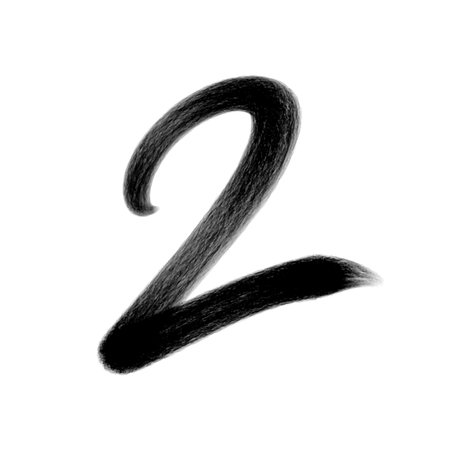

In [46]:
from fastai.vision.all import PILImage

img = PILImage.create('/home/t1nnur/Pictures/2.jpg')

prediction, pred_id, accuracy = learner.predict(img)

print(f"Prediction: {prediction}")
print(f"Accuracy: {accuracy[pred_id]}")
img

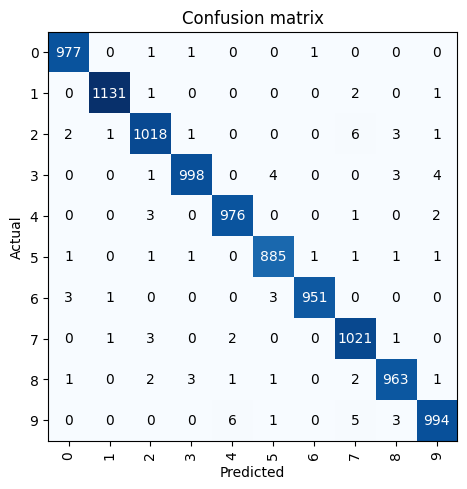

In [44]:
from fastai.vision.all import ClassificationInterpretation

interpretation = ClassificationInterpretation.from_learner(learner)
interpretation.plot_confusion_matrix()

In [57]:
learner.export('mnist.pkl')

In [59]:
from fastai.vision.all import load_learner

model = load_learner('/home/t1nnur/.fastai/data/mnist_png/mnist.pkl')
model

Prediction: 2                                                        
Accuracy: 0.4328440725803375


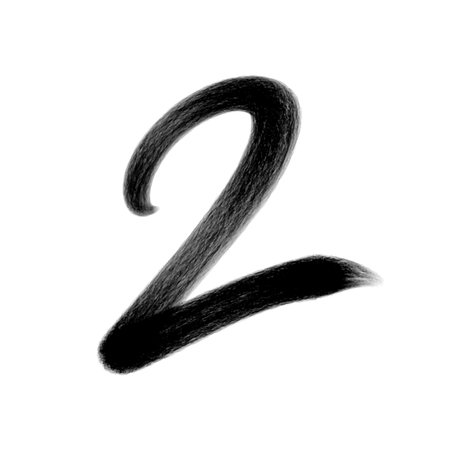

In [63]:
prediction, pred_id, percent = model.predict(img)

print(f"Prediction: {prediction}")
print(f"Accuracy: {accuracy[pred_id]}")
img